Project 4 - Scientific Computing - Kimi Kreilgaard (Twn176)

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Helper Functions

In [2]:
# Lets first define our system of first order ODE's in one function
def diff_eq_HIV(X, params):
    """
    Vector function defining our system of differential equations describing the spread of the HIV virus
    
    INPUTS:
    X = vector containing our variables: *X = x1, x2, y, z (len=4)
    params = list with known (or assumed) parameters (len=17)
             a1, a2, b1, b2, b3, c1, c2, d1, e, r1, r2, r3, r4, p1, p2, q, r
    
    OUTPUTS:
    diff_X = vector containing the solutions: *diff_X = dx1/dt, dx2/dt, dy/dt, dz/dt
    """
    # Make sure inputs are ndarrays if not convert
    if not isinstance(X,np.ndarray):
        X = np.array(X) #can convert tuple or lists into ndarrays
    if not isinstance(params,np.ndarray):
        params = np.array(params)
        
    # Unpack X
    x1, x2, y, z = X.T
    
    # Unpack parameters
    a1, a2, b1, b2, b3, c1, c2, d1, e, r1, r2, r3, r4, p1, p2, q, r = params.T
    
    # Define diff equations
    diff_x1 = a1*x1*(p1-x1) + a2*x2*(p1-x1) + e*(p1-x1) - r1*x1
    diff_x2 = b1*x1*(p2-x2) + b2*x2*(p2-x2) + b3*y*(p2-x2) + e*(p2-x2) - r2*x2
    diff_y = c1*x2*(q-y) + c2*z*(q-y) + e*(q-y)  - r3*y
    diff_z = d1*y*(r-z) + e*(r-z) - r4*z
    
    # Pack output into a single vector
    diff_X = np.array([diff_x1, diff_x2, diff_y, diff_z])
    
    return diff_X

In [3]:
# Make a forward Euler method
def forward_Euler(X, params, step_size, diff_eq):
    """
    Forward Euler method for first order ODE's
    
    INPUTS:
    X = vector containing our variables: *X = x1, x2, y, z (len=4)
    params = list with known (or assumed) parameters (len=17)
             a1, a2, b1, b2, b3, c1, c2, d1, e, r1, r2, r3, r4, p1, p2, q, r
    step_size = dt, the step to take in y(t+h)
    diff_eq = the differential equation to solve
    """
    
    # Get the slopes (dx1/dt, dx2/dt, dy/dt, dz/dt)
    diff_X = diff_eq(X, params)
    
    # Calculate next values of x_1, x_2, y and z with forward Euler
    new_X = X + step_size * diff_X
    
    return new_X

In [4]:
# Define Runge Kutta method
def Runge_Kutta_4th(X, params, step_size, diff_eq):
    
    # Calculate the coefficients k (time is not explicit here as in powerpoint)
    k1 = diff_eq(X, params)
    k2 = diff_eq(X + (step_size/2)*k1, params)
    k3 = diff_eq(X + (step_size/2)*k2, params)
    k4 = diff_eq(X + step_size*k3, params)
    
    # Calculate next values of x_1, x_2, y and z with rk4
    new_X = X + (step_size/6) * (k1 + 2*k2 + 2*k3 + k4)
    
    return new_X

In [5]:
# Define a function that puts the steps together and makes a simulation
def simulate(N, dt, X0, params, method ,diff = diff_eq_HIV):
    
    """
    INPUTS:
    N = number of steps to simulate
    dt = step size
    X0 = initial values on form [x1(t=t0), x2(t=t0), y(t=t0), z(t=t0)]
    params = list with known (or assumed) parameters (len=17)
             a1, a2, b1, b2, b3, c1, c2, d1, e, r1, r2, r3, r4, p1, p2, q, r
    method = a function describing the method to determine each step
             forward_Euler or Runge_Kutta_4th (or another function that takes the same input and returns X)
    diff = the differential equations on vector form (for this probblem we only use the default diff_eq_HIV)
    
    OUTPUT:
    X_arr = full list of solution for all N time steps
    """
    
    # Create data structure to store solutions
    X_arr = np.zeros((len(X0),N))
    X_arr[:,0] = X0
    
    # Simulate
    for i in range(N-1):
        X_arr[:,i+1] = method(X_arr[:,i], params, dt, diff)
    
    return X_arr

In [22]:
# Define function to plot the results
def plotter(t, X, method_title, ax=None, color=None, labels=True, help_lines=True):
    
    # Create figure if none is given
    if ax is None:
        fig, ax = plt.subplots(figsize=(12,6))
    
    ax.plot( t, X[0,:], color=color, label='Infected Homosexual Males' )
    ax.plot( t, X[1,:], color=color, label='Infected Bisexual Males' )
    ax.plot( t, X[2,:], color=color, label='Infected Heterosexual Females' )
    ax.plot( t, X[3,:], color=color, label='Infected Heterosexual Males' )
    
    if help_lines:
        ax.hlines(5, 0,t[-1], color='k', linestyle='dashed', label='x1=x2=5')
        ax.hlines(100, 0, t[-1], color='k', linestyle='dashed', label='q=r=100')
    
    ax.set_title('Simulation of HIV spread with ' + method_title, fontsize=16)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.set_xlabel('t', fontsize=16)
    ax.set_ylabel('Number of Infected', fontsize=16)
    
    if labels:
        ax.legend(fontsize=14)
    
    return None

# Suggested Parameter Values

In [24]:
# Initial conditions and parameters as suggested in the assignment
parameters = [10, 5, 5, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 5, 5, 100, 100]
X0 = [0.01, 0, 0, 0]

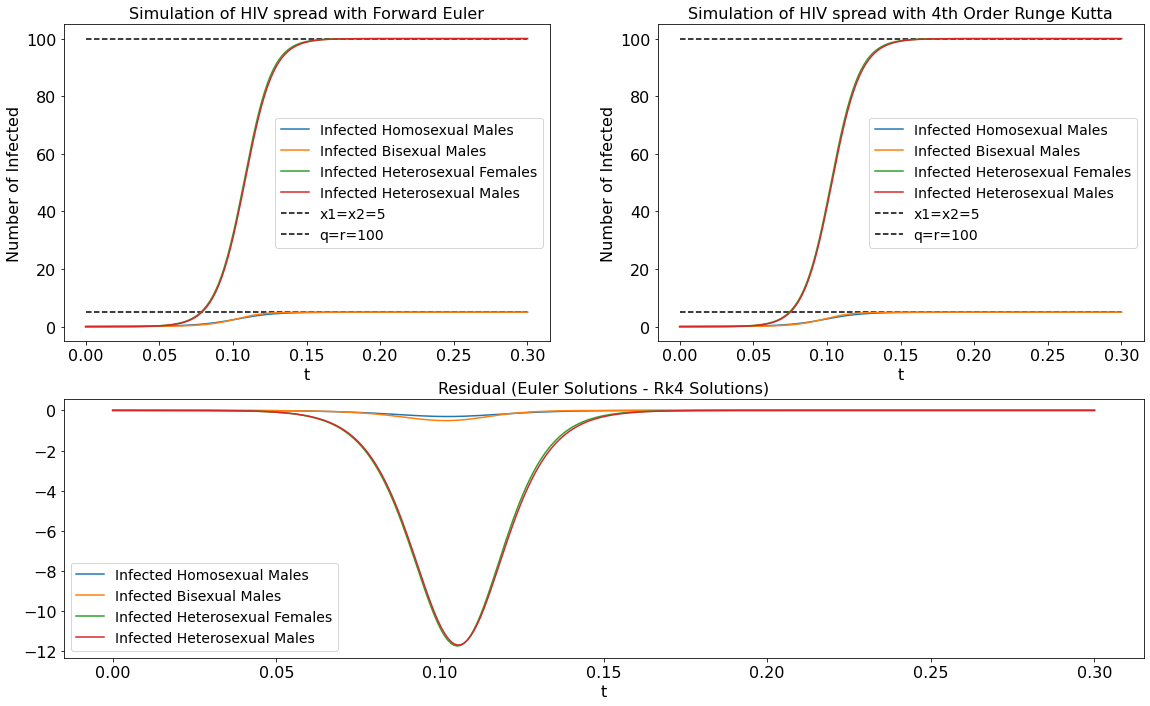

In [25]:
# Simulate with both Euler and Rk4

# Set up time steps
t0 = 0
dt = 0.001
N = int(0.3/dt)
t_arr = np.linspace(t0, t0+N*dt, N)

# Simulate
X_euler = simulate(N, dt, X0, parameters, forward_Euler)
X_rk4 = simulate(N, dt, X0, parameters, Runge_Kutta_4th)

# Plot both
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_axes([0,0.55,0.45,0.55]) #left,bottom,width,height
ax2 = fig.add_axes([0.55,0.55,0.45,0.55])
ax3 = fig.add_axes([0,0,1,0.45])

plotter(t_arr, X_euler,'Forward Euler', ax=ax1)
plotter(t_arr, X_rk4,'4th Order Runge Kutta', ax=ax2)

ax3.plot(t_arr,X_euler[0,:]-X_rk4[0,:], label='Infected Homosexual Males')
ax3.plot(t_arr,X_euler[1,:]-X_rk4[1,:], label='Infected Bisexual Males')
ax3.plot(t_arr,X_euler[2,:]-X_rk4[2,:], label='Infected Heterosexual Females')
ax3.plot(t_arr,X_euler[3,:]-X_rk4[3,:], label='Infected Heterosexual Males')
ax3.tick_params(axis='x', labelsize=16)
ax3.tick_params(axis='y', labelsize=16)
ax3.legend(fontsize=14)
ax3.set_title('Residual (Euler Solutions - Rk4 Solutions)', fontsize=16)
ax3.set_xlabel('t', fontsize=16)

plt.show()

# Test Euler Versus Rk4 Solutions

## Time of Stagnation

In [9]:
#### HOW QUICKLY DO THE SOLUTIONS STAGNATE? ####

# Function that find the time for average stagnation of infections in the four populations
def t_stagnate(X, t, t_cut, eps):
    """
    INPUTS:
    X = solution to the differential equations (containing all four populations)
    t = time array
    t_cut = value that defines after which t we should look for the function to stagnate 
            (since the solutions start out flat)
    eps = value that defines stagnation
    """
    
    # Isolate the part of the solution we want to consider
    mask = (t>t_cut)
    t_slice = t[mask]
    X_slice = np.array( [X[0,:][mask], X[1,:][mask], X[2,:][mask], X[3,:][mask] ])
    
    # Calculate delta y's
    delta_x1 = np.array( [abs(X_slice[0,i+1] - X_slice[0,i]) for i in range(len(X_slice[0,:])-1)] )
    delta_x2 = np.array([abs(X_slice[1,i+1] - X_slice[1,i]) for i in range(len(X_slice[0,:])-1)])
    delta_y = np.array([abs(X_slice[2,i+1] - X_slice[2,i]) for i in range(len(X_slice[0,:])-1)])
    delta_z = np.array([abs(X_slice[3,i+1] - X_slice[3,i]) for i in range(len(X_slice[0,:])-1)])
    
    # Calculate the time of stagnation for each of the populations
    t_x1 = t_slice[ np.argmax(delta_x1 < eps) ]
    t_x2 = t_slice[ np.argmax(delta_x2 < eps) ]
    t_y = t_slice[ np.argmax(delta_y < eps) ]
    t_z = t_slice[ np.argmax(delta_z < eps) ]

    # Return average time of stagnation for all populations
    return np.mean([t_x1, t_x2, t_y, t_z])

In [10]:
# Choose a epsilon and define when delta_y < epsilon the function stagnates
epsilon = 1e-4

# Check stagnation
t_stag_euler = t_stagnate(X_euler, t_arr, 0.1, epsilon)
t_stag_rk4 = t_stagnate(X_rk4, t_arr, 0.1, epsilon)

# Print results
print(t_stag_euler, t_stag_rk4)

0.20267558528428092 0.20217391304347826


## End Number of Infected

In [11]:
# Compare the end results
print('x1 \t\t\t x2 \t\t\t y \t\t\t z')
print(parameters[-4],'\t\t\t', parameters[-3],'\t\t\t', parameters[-2],'\t\t\t', parameters[-1] )
print(X_euler[0,-1],'\t', X_euler[1,-1],'\t', X_euler[2,-1],'\t', X_euler[3,-1] )
print(X_rk4[0,-1],'\t', X_rk4[1,-1],'\t', X_rk4[2,-1],'\t', X_rk4[3,-1] )

x1 			 x2 			 y 			 z
5 			 5 			 100 			 100
4.999999036594856 	 4.999999999988782 	 99.99999993639523 	 99.99999982239561
4.999998724725496 	 4.999999999966 	 99.99999988679379 	 99.99999970757855


## Larger dt

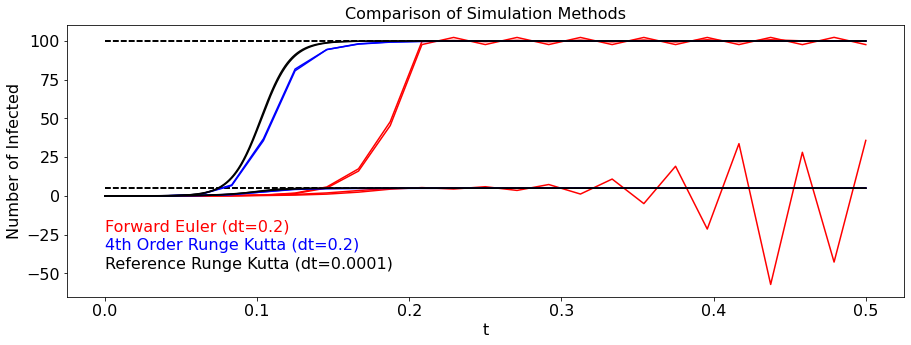

In [12]:
# Simulate with both Euler and Rk4 for LARGE dt

# Set up time steps
t0 = 0
dt = 0.02
N = int(0.5/dt)
t_arr = np.linspace(t0, t0+N*dt, N)

# Simulate
X_euler = simulate(N, dt, X0, parameters, forward_Euler)
X_rk4 = simulate(N, dt, X0, parameters, Runge_Kutta_4th)

# Plot both
fig, ax = plt.subplots(figsize=(15,5))
plotter(t_arr, X_euler,'Forward Euler', ax=ax, color='r', labels=False)
plotter(t_arr, X_rk4,'4th Order Runge Kutta', ax=ax, color='b', labels=False)

# Make a reference plot (low dt rk4)
t0 = 0
dt = 0.0001
N = int(0.5/dt)
t_arr = np.linspace(t0, t0+N*dt, N)
X_ref = simulate(N, dt, X0, parameters, Runge_Kutta_4th)
plotter(t_arr, X_ref,'4th Order Runge Kutta', ax=ax, color='k', labels=False)

# Make synthetic labels
ax.text(0, -23, 'Forward Euler (dt=0.2)', color='r', fontsize=16)
ax.text(0, -35, '4th Order Runge Kutta (dt=0.2)', color='b', fontsize=16)
ax.text(0, -47, 'Reference Runge Kutta (dt=0.0001)', color='k', fontsize=16)

ax.set_title('Comparison of Simulation Methods', fontsize=16)
plt.show()

# Exploring Different Parameters

## Population Size

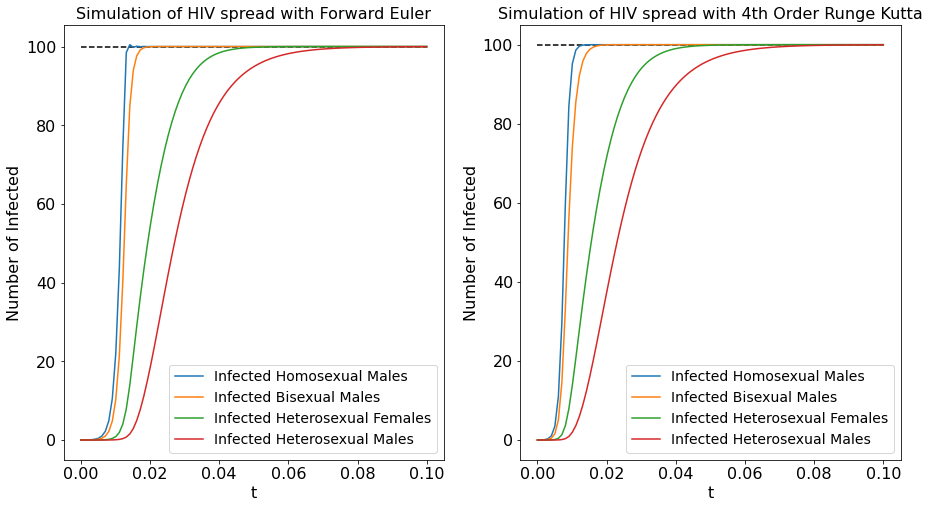

In [51]:
### Make each population same size ###

# Initial conditions and parameters as suggested in the assignment ------------------
parameters = [10, 5, 5, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 100, 100, 100, 100]
X0 = [0.01, 0, 0, 0]

# Simulate with both Euler and Rk4 -------------------------

# Set up time steps
t0 = 0
dt = 0.001
N = int(0.1/dt)
t_arr = np.linspace(t0, t0+N*dt, N)

# Simulate
X_euler = simulate(N, dt, X0, parameters, forward_Euler)
X_rk4 = simulate(N, dt, X0, parameters, Runge_Kutta_4th)

# Plot both
fig, ax = plt.subplots(ncols=2, figsize=(15,8))

plotter(t_arr, X_euler,'Forward Euler', ax=ax[0], help_lines=False)
plotter(t_arr, X_rk4,'4th Order Runge Kutta', ax=ax[1], help_lines=False)
ax[0].hlines(100, 0, t_arr[-1], color='k', linestyle='dashed', label='q=r=100')
ax[1].hlines(100, 0, t_arr[-1], color='k', linestyle='dashed', label='q=r=100')

plt.show()

## Rates of Infection

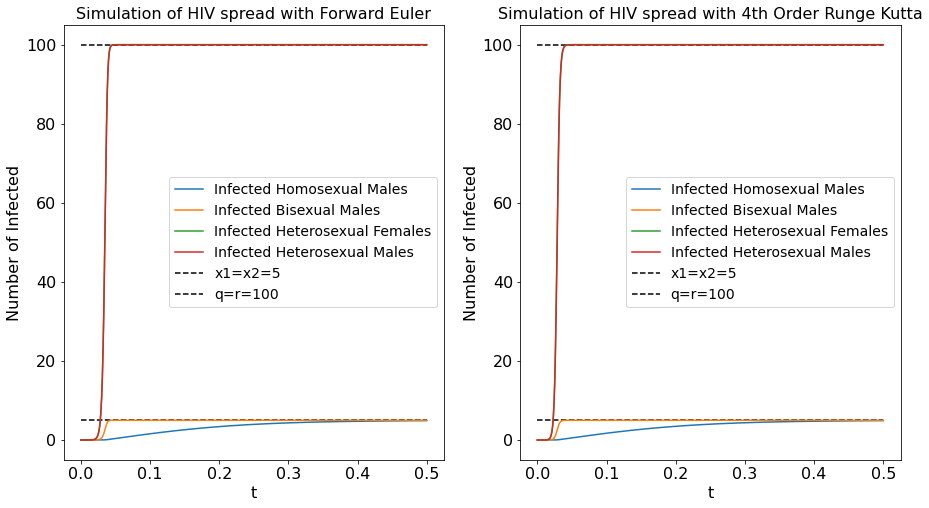

In [52]:
### Make hetero sexual contact more infective ###

# Initial conditions and parameters as suggested in the assignment ------------------
parameters = [1,1,1,1,5,5,5,5, 0, 0, 0, 0, 0, 5, 5, 100, 100]
X0 = [0.01, 0, 0, 0]

# Simulate with both Euler and Rk4 -------------------------

# Set up time steps
t0 = 0
dt = 0.001
N = int(0.5/dt)
t_arr = np.linspace(t0, t0+N*dt, N)

# Simulate
X_euler = simulate(N, dt, X0, parameters, forward_Euler)
X_rk4 = simulate(N, dt, X0, parameters, Runge_Kutta_4th)

# Plot both
fig, ax = plt.subplots(ncols=2, figsize=(15,8))

plotter(t_arr, X_euler,'Forward Euler', ax=ax[0], help_lines=True)
plotter(t_arr, X_rk4,'4th Order Runge Kutta', ax=ax[1], help_lines=True)

plt.show()

## Initial Values

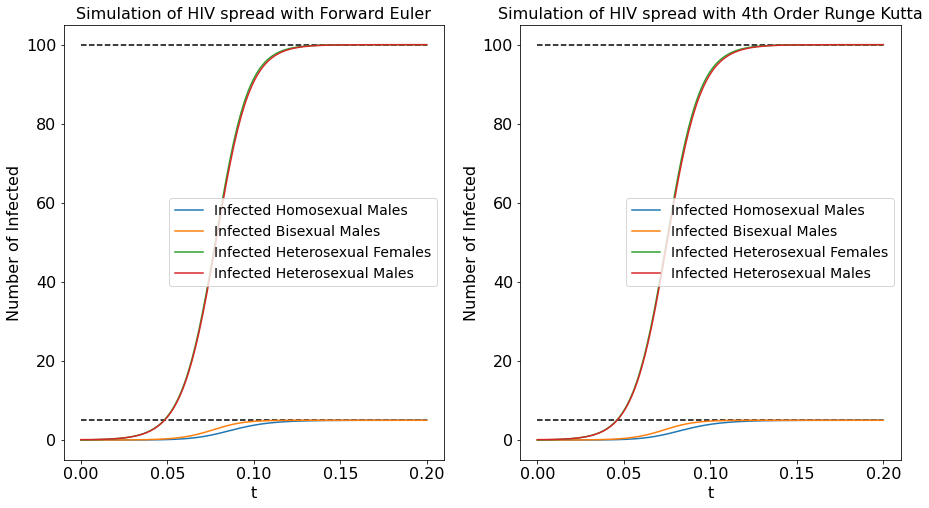

In [56]:
### Make hetero sexual contact more infective ###

# Initial conditions and parameters as suggested in the assignment ------------------
parameters = [10, 5, 5, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 5, 5, 100, 100]
X0 = [0, 0, 0, 0.1]

# Simulate with both Euler and Rk4 -------------------------

# Set up time steps
t0 = 0
dt = 0.001
N = int(0.2/dt)
t_arr = np.linspace(t0, t0+N*dt, N)

# Simulate
X_euler = simulate(N, dt, X0, parameters, forward_Euler)
X_rk4 = simulate(N, dt, X0, parameters, Runge_Kutta_4th)

# Plot both
fig, ax = plt.subplots(ncols=2, figsize=(15,8))

plotter(t_arr, X_euler,'Forward Euler', ax=ax[0], help_lines=False)
plotter(t_arr, X_rk4,'4th Order Runge Kutta', ax=ax[1], help_lines=False)
ax[0].hlines(5, 0, t_arr[-1], color='k', linestyle='dashed', label='q=r=100')
ax[1].hlines(5, 0, t_arr[-1], color='k', linestyle='dashed', label='q=r=100')
ax[0].hlines(100, 0, t_arr[-1], color='k', linestyle='dashed', label='q=r=100')
ax[1].hlines(100, 0, t_arr[-1], color='k', linestyle='dashed', label='q=r=100')

plt.show()

# Including Blood Transfusions (no frac)

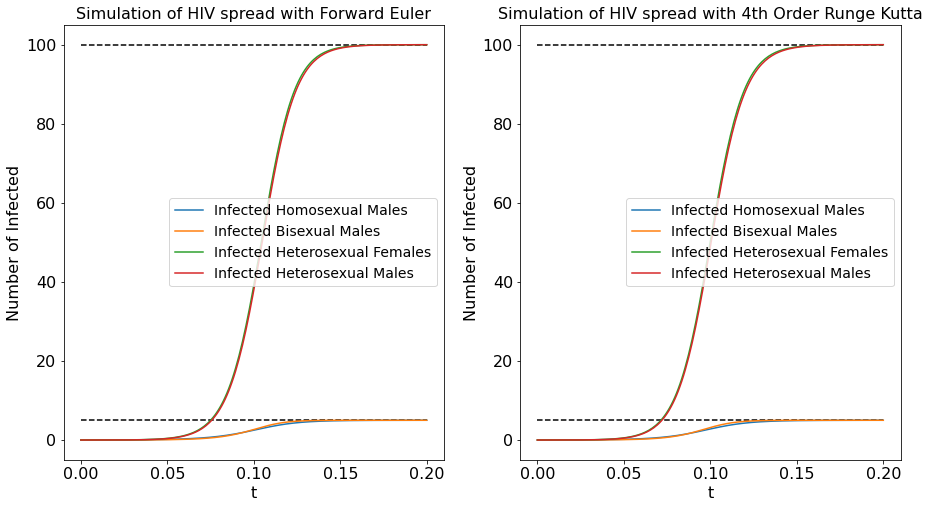

In [63]:
# Initial conditions and parameters
e_val = 0.001
parameters = [10, 5, 5, 1, 1, 1, 1, 1, e_val, 0, 0, 0, 0, 5, 5, 100, 100]
X0 = [0.01, 0, 0, 0]

# Simulate with both Euler and Rk4 -------------------------

# Set up time steps
t0 = 0
dt = 0.001
N = int(0.2/dt)
t_arr = np.linspace(t0, t0+N*dt, N)

# Simulate
X_euler = simulate(N, dt, X0, parameters, forward_Euler)
X_rk4 = simulate(N, dt, X0, parameters, Runge_Kutta_4th)

# Plot both
fig, ax = plt.subplots(ncols=2, figsize=(15,8))

plotter(t_arr, X_euler,'Forward Euler', ax=ax[0], help_lines=False)
plotter(t_arr, X_rk4,'4th Order Runge Kutta', ax=ax[1], help_lines=False)
ax[0].hlines(5, 0, t_arr[-1], color='k', linestyle='dashed', label='q=r=100')
ax[1].hlines(5, 0, t_arr[-1], color='k', linestyle='dashed', label='q=r=100')
ax[0].hlines(100, 0, t_arr[-1], color='k', linestyle='dashed', label='q=r=100')
ax[1].hlines(100, 0, t_arr[-1], color='k', linestyle='dashed', label='q=r=100')

plt.show()

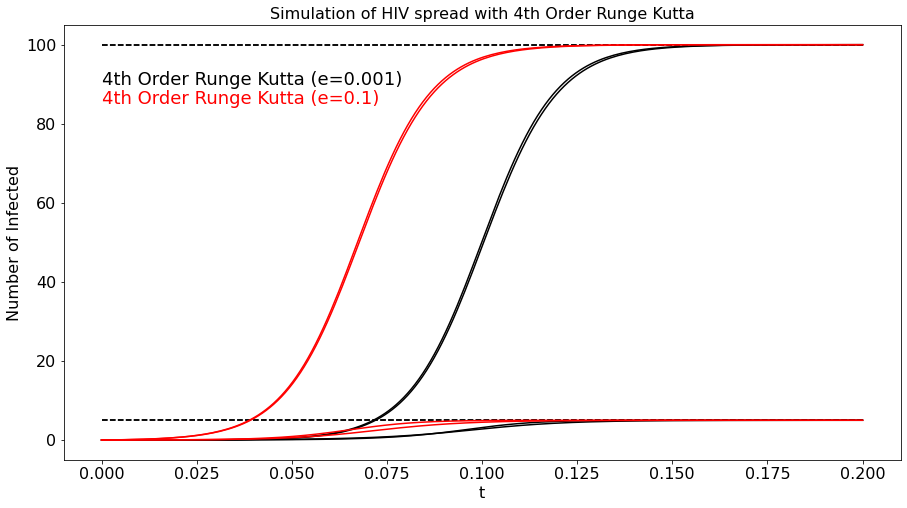

In [74]:
### INCREASING E ###

# LOW E
e_val = 0.001
parameters = [10, 5, 5, 1, 1, 1, 1, 1, e_val, 0, 0, 0, 0, 5, 5, 100, 100]
X0 = [0.01, 0, 0, 0]
t0 = 0
dt = 0.001
N = int(0.2/dt)
t_arr = np.linspace(t0, t0+N*dt, N)
X_low = simulate(N, dt, X0, parameters, Runge_Kutta_4th)

# HIGH E
e_val = 0.1
parameters = [10, 5, 5, 1, 1, 1, 1, 1, e_val, 0, 0, 0, 0, 5, 5, 100, 100]
X0 = [0.01, 0, 0, 0]
t0 = 0
dt = 0.001
N = int(0.2/dt)
t_arr = np.linspace(t0, t0+N*dt, N)
X_high = simulate(N, dt, X0, parameters, Runge_Kutta_4th)

# Plot both
fig, ax = plt.subplots(figsize=(15,8))
plotter(t_arr, X_low,'4th Order Runge Kutta', ax=ax, labels=False, color='k')
plotter(t_arr, X_high,'4th Order Runge Kutta', ax=ax, labels=False, color='r')

# Make synthetic labels
ax.text(0, 90, '4th Order Runge Kutta (e=0.001)', color='k', fontsize=18)
ax.text(0, 85, '4th Order Runge Kutta (e=0.1)', color='r', fontsize=18)

plt.show()

# Including Death

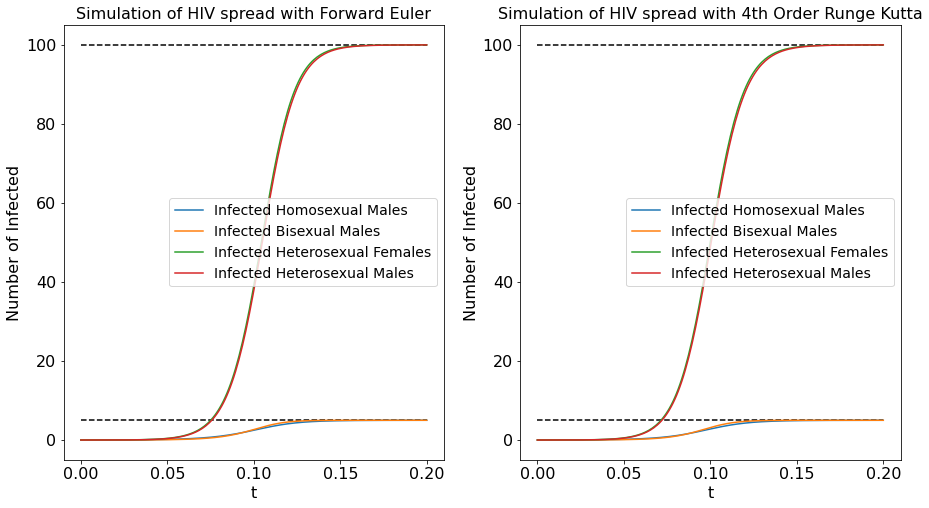

In [89]:
# Initial conditions and parameters
e_val = 0.001
r_val = 0.05
parameters = [10, 5, 5, 1, 1, 1, 1, 1, e_val, r_val, r_val, r_val, r_val, 5, 5, 100, 100]
X0 = [0.01, 0, 0, 0]

# Simulate with both Euler and Rk4 -------------------------

# Set up time steps
t0 = 0
dt = 0.001
N = int(0.2/dt)
t_arr = np.linspace(t0, t0+N*dt, N)

# Simulate
X_euler = simulate(N, dt, X0, parameters, forward_Euler)
X_rk4 = simulate(N, dt, X0, parameters, Runge_Kutta_4th)

# Plot both
fig, ax = plt.subplots(ncols=2, figsize=(15,8))

plotter(t_arr, X_euler,'Forward Euler', ax=ax[0], help_lines=False)
plotter(t_arr, X_rk4,'4th Order Runge Kutta', ax=ax[1], help_lines=False)
ax[0].hlines(5, 0, t_arr[-1], color='k', linestyle='dashed', label='q=r=100')
ax[1].hlines(5, 0, t_arr[-1], color='k', linestyle='dashed', label='q=r=100')
ax[0].hlines(100, 0, t_arr[-1], color='k', linestyle='dashed', label='q=r=100')
ax[1].hlines(100, 0, t_arr[-1], color='k', linestyle='dashed', label='q=r=100')

plt.show()

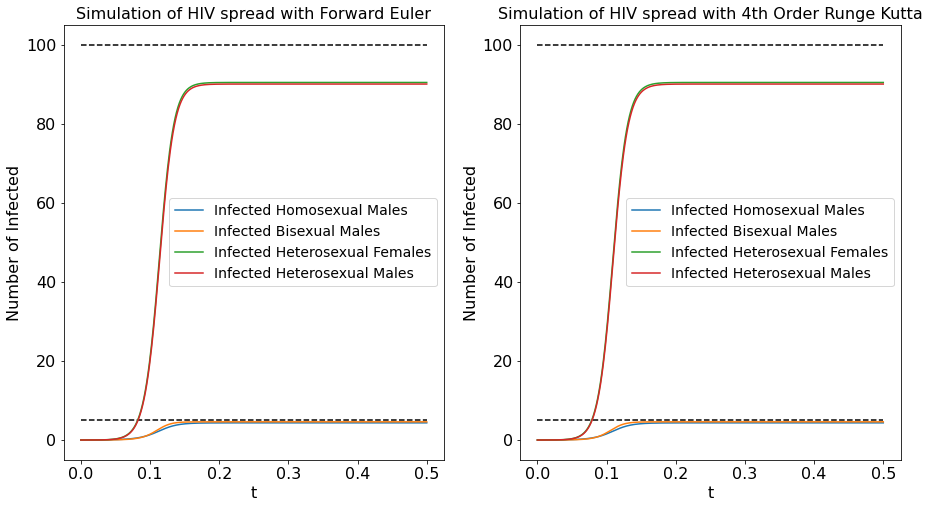

In [92]:
### INCREASE R ###

# Initial conditions and parameters
e_val = 0.001
r_val = 10
parameters = [10, 5, 5, 1, 1, 1, 1, 1, e_val, r_val, r_val, r_val, r_val, 5, 5, 100, 100]
X0 = [0.01, 0, 0, 0]

# Simulate with both Euler and Rk4 -------------------------

# Set up time steps
t0 = 0
dt = 0.001
N = int(0.5/dt)
t_arr = np.linspace(t0, t0+N*dt, N)

# Simulate
X_euler = simulate(N, dt, X0, parameters, forward_Euler)
X_rk4 = simulate(N, dt, X0, parameters, Runge_Kutta_4th)

# Plot both
fig, ax = plt.subplots(ncols=2, figsize=(15,8))

plotter(t_arr, X_euler,'Forward Euler', ax=ax[0], help_lines=False)
plotter(t_arr, X_rk4,'4th Order Runge Kutta', ax=ax[1], help_lines=False)
ax[0].hlines(5, 0, t_arr[-1], color='k', linestyle='dashed', label='q=r=100')
ax[1].hlines(5, 0, t_arr[-1], color='k', linestyle='dashed', label='q=r=100')
ax[0].hlines(100, 0, t_arr[-1], color='k', linestyle='dashed', label='q=r=100')
ax[1].hlines(100, 0, t_arr[-1], color='k', linestyle='dashed', label='q=r=100')

plt.show()